Start SparkSession

In [16]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Healthcare Dataset Challenge").getOrCreate()

Reading data as dataframe

In [17]:
healthcareData = spark.read.format("csv").options(header="true", inferschema="true").load("healthcare-dataset-stroke-data.csv")

Understanding the dataframe

In [18]:
healthcareData.printSchema() #mostra o esquema inferido pelas variáveis
healthcareData.count()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



5110

Top 20 rows

In [19]:
healthcareData.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

Basics of the numeric characteristics

In [20]:
numerics_inputs  = ['age',"avg_glucose_level", "bmi"]
healthcareData.describe(numerics_inputs).show(truncate=False)

+-------+------------------+------------------+------------------+
|summary|age               |avg_glucose_level |bmi               |
+-------+------------------+------------------+------------------+
|count  |5110              |5110              |5110              |
|mean   |43.226614481409015|106.14767710371804|28.893236911794673|
|stddev |22.61264672311348 |45.28356015058193 |7.85406672968016  |
|min    |0.08              |55.12             |10.3              |
|max    |82.0              |271.74            |N/A               |
+-------+------------------+------------------+------------------+



Stroke by age

In [21]:
healthcareData.groupby('gender','stroke').count().sort("count",ascending=True).show()

+------+------+-----+
|gender|stroke|count|
+------+------+-----+
| Other|     0|    1|
|  Male|     1|  108|
|Female|     1|  141|
|  Male|     0| 2007|
|Female|     0| 2853|
+------+------+-----+



Residence types

In [22]:
#contando a quantidade de valores desconhecidos
from pyspark.sql.functions import *
healthcareData.groupby('Residence_type').agg({'Residence_type': 'count'}).sort(asc("count(Residence_type)")).show()

+--------------+---------------------+
|Residence_type|count(Residence_type)|
+--------------+---------------------+
|         Rural|                 2514|
|         Urban|                 2596|
+--------------+---------------------+



Avg glucose level

In [76]:
healthcareData.select('avg_glucose_level').agg(percentile_approx('avg_glucose_level', [0.25, 0.5, 0.75], lit(100000))).show(truncate=False)

+--------------------------------------------------------------------+
|percentile_approx(avg_glucose_level, array(0.25, 0.5, 0.75), 100000)|
+--------------------------------------------------------------------+
|[77.24, 91.88, 114.09]                                              |
+--------------------------------------------------------------------+



<AxesSubplot:>

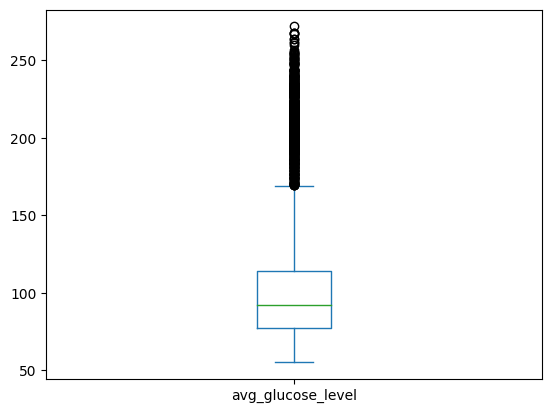

In [77]:
healthcareData.select('avg_glucose_level').toPandas().plot.box()

<AxesSubplot:ylabel='Frequency'>

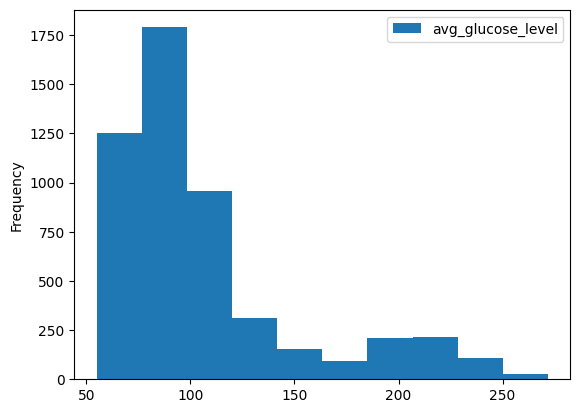

In [78]:
healthcareData.select('avg_glucose_level').toPandas().plot.hist()

Exploring Age

In [72]:
healthcareData.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [73]:
healthcareData.select('age').agg(percentile_approx('age', [0.25, 0.5, 0.75], lit(100000))).show(truncate=False)

+------------------------------------------------------+
|percentile_approx(age, array(0.25, 0.5, 0.75), 100000)|
+------------------------------------------------------+
|[25.0, 45.0, 61.0]                                    |
+------------------------------------------------------+



<AxesSubplot:>

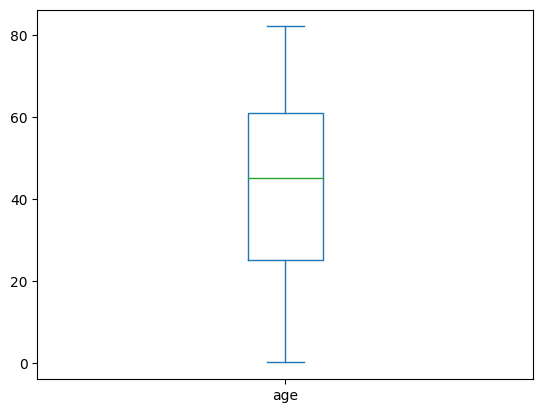

In [74]:
healthcareData.select('age').toPandas().plot.box()

<AxesSubplot:ylabel='Frequency'>

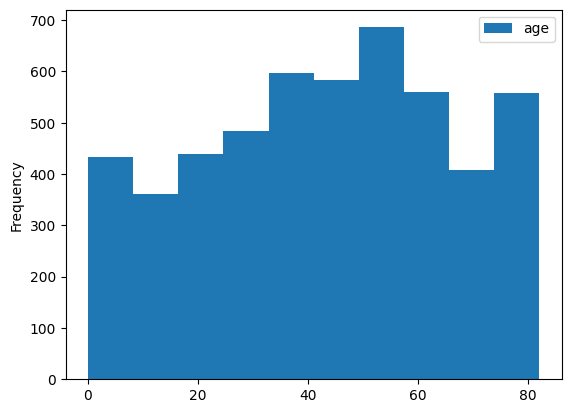

In [75]:
healthcareData.select('age').toPandas().plot.hist()

What are is work types?

In [63]:
healthcareData.groupBy("work_type").agg({'work_type': 'count'}).sort(asc("count(work_type)")).show()

+-------------+----------------+
|    work_type|count(work_type)|
+-------------+----------------+
| Never_worked|              22|
|     Govt_job|             657|
|     children|             687|
|Self-employed|             819|
|      Private|            2925|
+-------------+----------------+



BMI and Smoking

In [69]:
healthcareData.groupBy('smoking_status').agg({'smoking_status': 'count'}).sort(asc("count(smoking_status)")).show()

+---------------+---------------------+
| smoking_status|count(smoking_status)|
+---------------+---------------------+
|         smokes|                  789|
|formerly smoked|                  885|
|        Unknown|                 1544|
|   never smoked|                 1892|
+---------------+---------------------+



In [70]:
healthcareData.groupBy('bmi').agg({'bmi': 'count'}).sort(desc("count(bmi)")).show()

+----+----------+
| bmi|count(bmi)|
+----+----------+
| N/A|       201|
|28.7|        41|
|28.4|        38|
|27.7|        37|
|26.1|        37|
|27.6|        37|
|26.7|        37|
|23.4|        36|
|27.3|        36|
|  27|        35|
|26.4|        34|
|26.9|        34|
|25.1|        34|
|25.5|        33|
|23.5|        31|
|28.9|        31|
|24.8|        31|
|26.5|        30|
|29.4|        30|
|31.4|        30|
+----+----------+
only showing top 20 rows



In [83]:
healthcareData.describe('bmi').show()

+-------+------------------+
|summary|               bmi|
+-------+------------------+
|  count|              5110|
|   mean|28.893236911794673|
| stddev|  7.85406672968016|
|    min|              10.3|
|    max|               N/A|
+-------+------------------+



Analising the smoking and strokes of this data

In [84]:
display(healthcareData.groupby('smoking_status','stroke').count().sort("count",ascending=True))

smoking_status,stroke,count
smokes,1,42
Unknown,1,47
formerly smoked,1,70
never smoked,1,90
smokes,0,747
formerly smoked,0,815
Unknown,0,1497
never smoked,0,1802


Not used, explore this

In [85]:
#seleção de colunas
healthcareData.select('age','hypertension').show(5)

+----+------------+
| age|hypertension|
+----+------------+
|67.0|           0|
|61.0|           0|
|80.0|           0|
|49.0|           0|
|79.0|           1|
+----+------------+
only showing top 5 rows



The dataset is balanced for stroke and hypertension

In [108]:
display(healthcareData.groupby('hypertension','stroke').count().sort("count",ascending=True))

hypertension,stroke,count
1,1,66
0,1,183
1,0,432
0,0,4429


O que podemos dizer sobre o gráfico anterior?

In [87]:
display(healthcareData.groupby('stroke').count())

stroke,count
1,249
0,4861


O dataset está balanceado?

In [88]:
#utilizando crosstab para contar a quantidade de indivíduos com que ganho mais de 50K pela idade
healthcareData.filter(healthcareData.gender== 'Female').count()

2994

3) Pré-processamento dos dados

In [89]:
#contando a quantidade de valores desconhecidos
healthcareData.groupby('Residence_type').agg({'Residence_type': 'count'}).sort(asc("count(Residence_type)")).show()

+--------------+---------------------+
|Residence_type|count(Residence_type)|
+--------------+---------------------+
|         Rural|                 2514|
|         Urban|                 2596|
+--------------+---------------------+



Quantas classes diferentes de trabalho (work_type) existem no dataset? Fiquem atentos, pois não é essa informação que o tabela anterior está exibindo.

In [90]:
mean = healthcareData.select(mean(healthcareData['bmi'])).collect()
mean_bmi = mean[0][0]
dataset_desafio = healthcareData.na.fill(mean_bmi,['bmi'])

TypeError: 'list' object is not callable

In [91]:
#aplicando o filtro para as colunas que possuem valores não conhecidos
dataset_filtrado=dataset_desafio.filter((dataset_desafio['bmi'] != 'N/A') & (dataset_desafio['smoking_status'] > 'Unknown'))

In [93]:
# aplicando a transformação dos dados categóricos
from pyspark.ml.feature import VectorAssembler,OneHotEncoder, StringIndexer

In [94]:
#define a transformação para a variável "gender"
stringIndexer_gender=StringIndexer(inputCol="gender", outputCol="gender_encoded")  #label encoding
encoder_gender = OneHotEncoder(dropLast=False, inputCol="gender_encoded", outputCol="genderVec") #one-hot encoding

In [95]:
#define a transformação para a variável "ever_married"
stringIndexer_married=StringIndexer(inputCol="ever_married", outputCol="ever_married_encoded") #label encoding
encoder_married = OneHotEncoder(dropLast=False, inputCol="ever_married_encoded", outputCol="marriedVec") #one-hot encoding

In [96]:
#define a transformação para a variável "work_type"
stringIndexer_work=StringIndexer(inputCol="work_type", outputCol="work_type_encoded")  #label encoding
encoder_work = OneHotEncoder(dropLast=False, inputCol="work_type_encoded", outputCol="workVec") #one-hot encoding

In [97]:
#define a transformação para a variável "Residence_type"
stringIndexer_residence=StringIndexer(inputCol="Residence_type", outputCol="Residence_type_encoded")  #label encoding
encoder_residence = OneHotEncoder(dropLast=False, inputCol="Residence_type_encoded", outputCol="residenceVec") #one-hot encoding

In [98]:
#define a transformação para a variável "smoking_status"
stringIndexer_smoking=StringIndexer(inputCol="smoking_status", outputCol="smoking_status_encoded")  #define o objeto
encoder_smoking = OneHotEncoder(dropLast=False, inputCol="smoking_status_encoded", outputCol="smokingVec")#one-hot encoding

In [99]:
#define a construção do vetor de entrada
colunas_entrada=['age','hypertension', 'heart_disease','avg_glucose_level','genderVec','marriedVec','workVec','residenceVec','smokingVec']
vetor_entrada = VectorAssembler(inputCols=colunas_entrada,outputCol='features')

In [100]:
#define a sequencia de transformações para o pipeline
sequencia_transformacoes=[stringIndexer_gender,stringIndexer_married,stringIndexer_work,stringIndexer_residence,stringIndexer_smoking,encoder_gender,encoder_married,encoder_work,encoder_residence,encoder_smoking,vetor_entrada]

In [101]:
from pyspark.ml import Pipeline
# Aplicando o pipeline
pipeline = Pipeline(stages=sequencia_transformacoes)
pipelineModel = pipeline.fit(dataset_filtrado)
model = pipelineModel.transform(dataset_filtrado)

In [102]:
#mostrando parte dos dados para entrada
model.select('age','gender','genderVec','ever_married','marriedVec','features').show()

+----+------+-------------+------------+-------------+--------------------+
| age|gender|    genderVec|ever_married|   marriedVec|            features|
+----+------+-------------+------------+-------------+--------------------+
|67.0|  Male|(3,[1],[1.0])|         Yes|(2,[0],[1.0])|(19,[0,2,3,5,7,9,...|
|80.0|  Male|(3,[1],[1.0])|         Yes|(2,[0],[1.0])|(19,[0,2,3,5,7,9,...|
|49.0|Female|(3,[0],[1.0])|         Yes|(2,[0],[1.0])|(19,[0,3,4,7,9,14...|
|79.0|Female|(3,[0],[1.0])|         Yes|(2,[0],[1.0])|(19,[0,1,3,4,7,10...|
|81.0|  Male|(3,[1],[1.0])|         Yes|(2,[0],[1.0])|(19,[0,3,5,7,9,14...|
|74.0|  Male|(3,[1],[1.0])|         Yes|(2,[0],[1.0])|(19,[0,1,2,3,5,7,...|
|69.0|Female|(3,[0],[1.0])|          No|(2,[1],[1.0])|(19,[0,3,4,8,9,14...|
|81.0|Female|(3,[0],[1.0])|         Yes|(2,[0],[1.0])|(19,[0,1,3,4,7,9,...|
|61.0|Female|(3,[0],[1.0])|         Yes|(2,[0],[1.0])|(19,[0,2,3,4,7,11...|
|54.0|Female|(3,[0],[1.0])|         Yes|(2,[0],[1.0])|(19,[0,3,4,7,9,14...|
|79.0|Female

In [103]:
#dividindo o dataset entre teste e treinamento
train_data, test_data = model.randomSplit([.8,.2],seed=1)

Qual foi, respectivamente, o percentual de dados escolhidos para treinamento e teste dos modelos?

In [104]:
#mostrando os dados de treinamento
train_data.columns

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke',
 'gender_encoded',
 'ever_married_encoded',
 'work_type_encoded',
 'Residence_type_encoded',
 'smoking_status_encoded',
 'genderVec',
 'marriedVec',
 'workVec',
 'residenceVec',
 'smokingVec',
 'features']

Realizando a previsão através da Regressão Logística

In [105]:
#define o modelo de regrssão logística
from pyspark.ml.classification import LogisticRegression

#instancia o objeto para a regressão logística
lr = LogisticRegression(labelCol="stroke",featuresCol="features", maxIter=100, regParam=0.3, )

# treina o modelo
linearModel = lr.fit(train_data)

In [106]:
#realiza a previsão utilizando o modelo de regressão logística
previsao_regressao = linearModel.transform(test_data)

In [107]:
#avaliando a classificação realizada pela regressão logística
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction", metricName="accuracy")
acuracia_regressao = acc_evaluator.evaluate(previsao_regressao)
print('Regressão Logística: {0:2.2f}%'.format(acuracia_regressao*100))

Regressão Logística: 94.31%
